# Delinquency Telecom Model
### Definition: 
- __Delinquency__ is a condition that arises when an activity or situation does not occur at its scheduled (or expected) date i.e., it occurs later than expected.

### Use Case: 
- Many donors, experts, and microfinance institutions (MFI) have become convinced that using mobile financial services (MFS) is more convenient and efficient, and less costly, than the traditional high-touch model for delivering microfinance services. MFS becomes especially useful when targeting the unbanked poor living in remote areas. The implementation of MFS, though, has been uneven with both significant challenges and successes.
- Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

- One of our Client in Telecom collaborates with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be delinquent if he deviates from the path of paying back the loaned amount within 5 days

### Machine Learning problem : 
- Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan (Label ‘1’ & ’0’)
- Basically a Binary Classification setup

### Business objectives and constraints.
- No low-latency requirement for Paying Back loaned amount.
- Probability of a data-point belonging to each loan transaction is needed.


### Performance Metric

- Log-loss (Since probabilities is our concern)
- Confusion matrix (Also want to check some precision and recalls)

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 40kB/s 


**IMPORT NECESSARY LIBRARIES**
ALL REQUIRED LIBRARIES ARE AT FIRST LOADED
PANDAS USED FOR THE DATA HANDLING
MATPLOTLIB AND SEABORN USED FOR DATA VISUALIZATION
Numpy Provides faster data handling and also important mathematical features

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
sns.set(color_codes=True)
import os
from sklearn.model_selection import GridSearchCV 
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Boosting Algorithms :
from xgboost  import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score
from sklearn.linear_model import SGDClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


We should always target to increase sensitivity over specificity as sensitivity
is the true positive rate whereas specificity is the false positive rate.
*True Positive* : These are the correctly predicted positive values which means 
that the value of actual class is yes and the value of predicted class is also 
yes.
*False Positive* : These are the wrongly predicted positive values which means
that the value of actual class is no and the predicted class is yes.
All the important parameters such as Accuracy, Precision and Recall depend upon
our True positive rate.So if there is a increase in false positive rate then 
therewill be a downgrade in these parameters which in return will give not so good outcomes.

**READ IN AND EXPLORE THE DATA**

In [ ]:
df = pd.read_csv('/content/sample_data_intw.csv')

In [ ]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
print("Size of data = {}".format(df.shape))

Size of data = (118071, 36)


## Checks for Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118071 entries, 0 to 118070
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 118071 non-null  int64  
 1   msisdn                118071 non-null  object 
 2   aon                   118071 non-null  float64
 3   daily_decr30          118071 non-null  float64
 4   daily_decr90          118071 non-null  float64
 5   rental30              118071 non-null  float64
 6   rental90              118071 non-null  float64
 7   last_rech_date_ma     118071 non-null  float64
 8   last_rech_date_da     118071 non-null  float64
 9   last_rech_amt_ma      118071 non-null  int64  
 10  cnt_ma_rech30         118071 non-null  int64  
 11  fr_ma_rech30          118071 non-null  float64
 12  sumamnt_ma_rech30     118071 non-null  float64
 13  medianamnt_ma_rech30  118071 non-null  float64
 14  medianmarechprebal30  118071 non-null  float64
 15  

In [ ]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 1
pdate                   1
dtype: int64

In [ ]:
print(df.dtypes) 
#It Tells us about the data Types of all the feature in the data

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [ ]:
df.drop('pcircle',axis=1,inplace=True) #Same value , so not much informative

In [ ]:
# Checking for duplicate values
print("Number of duplicate values in data set is "+str(sum(df.duplicated())))

Number of duplicate values in data set is 0


### Separating features and class labels

In [ ]:
X = df
X = X.drop(["label"], axis = 1)

y = df['label']

In [ ]:
X.shape , y.shape

((118071, 34), (118071,))

**DATA Visulazation**

## Checking Data Imbalances

1    103326
0     14745
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


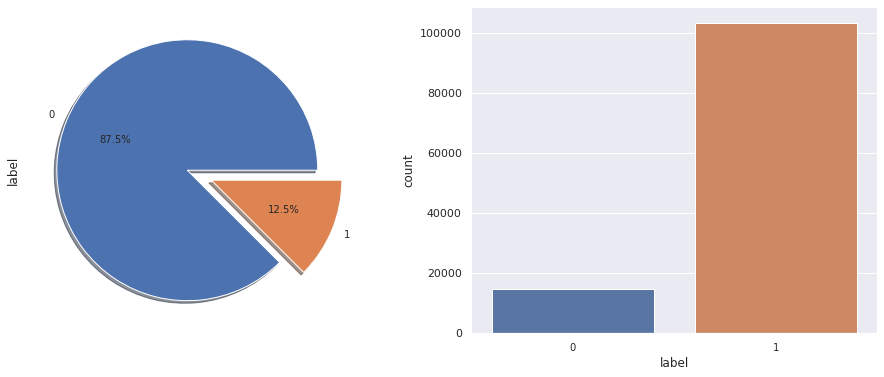

In [ ]:
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['0', '1']
df['label'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10)
sns.countplot('label',data=df, ax=ax[1])
ax[1].set_xticklabels(['0', '1'], fontsize=10)
plt.show()

- Imbalanced Data

In [ ]:
## See the number of of outliers 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('No. of outliers in all the fields: ',((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

No. of outliers in all the fields:  amnt_loans30             5835
amnt_loans90             7102
aon                      2048
cnt_da_rech30            2344
cnt_da_rech90            3057
cnt_loans30              4373
cnt_loans90              6482
cnt_ma_rech30            6271
cnt_ma_rech90            7960
daily_decr30             9236
daily_decr90            10283
fr_da_rech30              922
fr_da_rech90              515
fr_ma_rech30             6399
fr_ma_rech90            15116
label                   14745
last_rech_amt_ma        11794
last_rech_date_da        3854
last_rech_date_ma       11335
maxamnt_loans30         17019
maxamnt_loans90         16015
medianamnt_loans30       8041
medianamnt_loans90       6954
medianamnt_ma_rech30    14117
medianamnt_ma_rech90    14402
medianmarechprebal30    15256
medianmarechprebal90    14615
msisdn                      0
payback30                9304
payback90               10023
pdate                       0
rental30                10539
rent

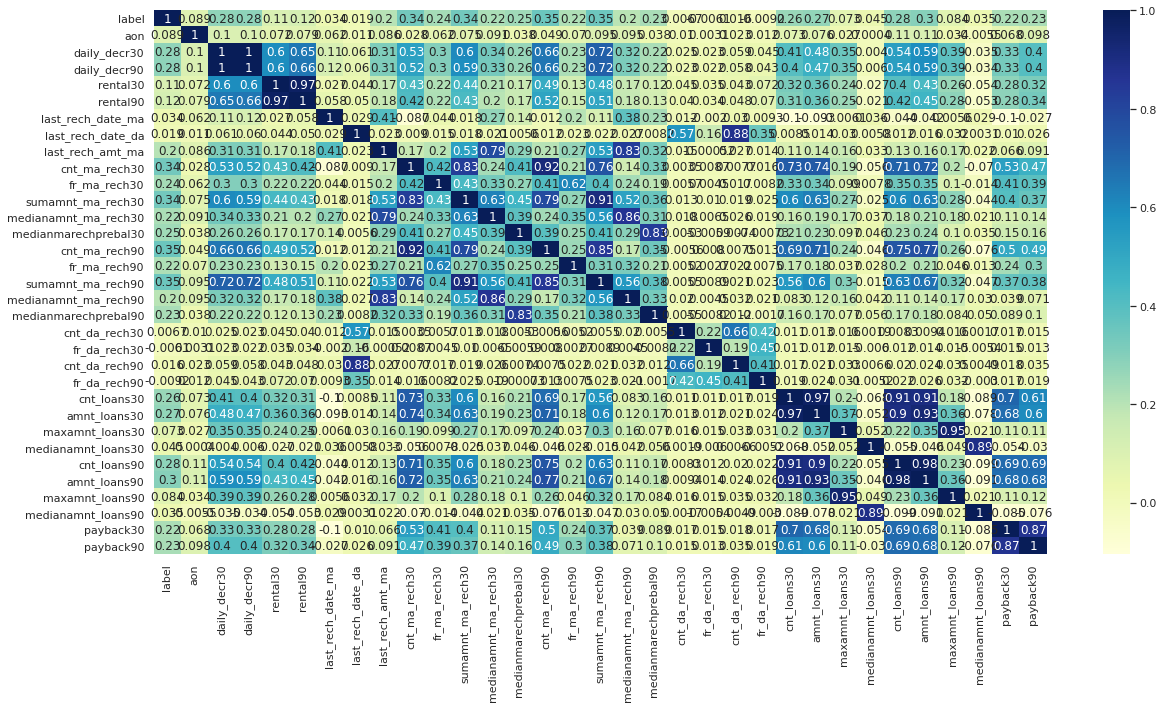

In [ ]:
# Correlations
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="YlGnBu")

 **DATA CLEANING**


### Convert all columns to numeric

In [ ]:
for i in X.columns:
    if i=='pdate':
        continue
    else:
        X[i]=pd.to_numeric(X[i],errors='coerce')

In [ ]:
df['msisdn'].value_counts()

42825I88688    6
30080I90588    6
78160I89231    5
45099I84456    5
78109I96341    5
              ..
23225I90588    1
04397I85328    1
58944I89239    1
10120I88648    1
09988I70374    1
Name: msisdn, Length: 110088, dtype: int64

In [ ]:
X.drop(['msisdn','pdate'],axis=1,inplace=True) # Not much informative in this case

In [ ]:
X = np.array(X)

## Train Test Split

In [ ]:
#We used the normalizer to stop the spread of the data and Normalized both training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.25,random_state = 42)

## Standardize the features


In [ ]:
#Use standardscaler to standardize the features

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_cv  = sc.transform(X_cv)
X_test  = sc.transform(X_test)

In [ ]:
(len(X_train),len(y_train),len(X_test),len(y_test),len(X_cv),len(y_cv))

(66414, 66414, 29518, 29518, 22139, 22139)

## UTILITY FUNCTIONS

In [ ]:
def plot_matrix(matrix,labels):
    plt.figure(figsize=(20,7))    
    sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    cm = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    recall_table =(((cm.T)/(cm.sum(axis=1))).T)
    # How did we calculateed recall_table :
    # divide each element of the confusion matrix with the sum of elements in that column    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]
    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    precision_table =(cm/cm.sum(axis=0))
    # How did we calculateed precision_table :
    # divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]    
    print()
    print("-"*20, "Confusion matrix", "-"*20)
    plot_matrix(cm,labels)

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plot_matrix(precision_table,labels)    
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plot_matrix(recall_table,labels)

In [ ]:
#Data preparation for ML models.

#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [ ]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [ ]:
Xr = np.array(X_test)
yr = np.array(y_test)

**# Feature Selection**

## NOTE : 
- Since we want a prediction probabilistic interpretation from the model under one of the two classes(1 or 0). so we will use __LogLoss__ as the Metric here
***Prediction Probability:*** The binary classification algorithms First predict probability for a recored to be classified under class (1 or 0) based on whether the probability crossed a threshold value,which is usually set at 0.5 by default.


## Prediction using a 'Random' Model
- We build a random model to compare the log- loss of random model with the ML models used by us. 
- In a 'Random' Model, we generate the '2' class probabilites randomly such that they sum to 1.




Log loss on Cross Validation Data using Random Model 0.8871633966784495
Log loss on Test Data using Random Model 0.8878708721364589

-------------------- Confusion matrix --------------------


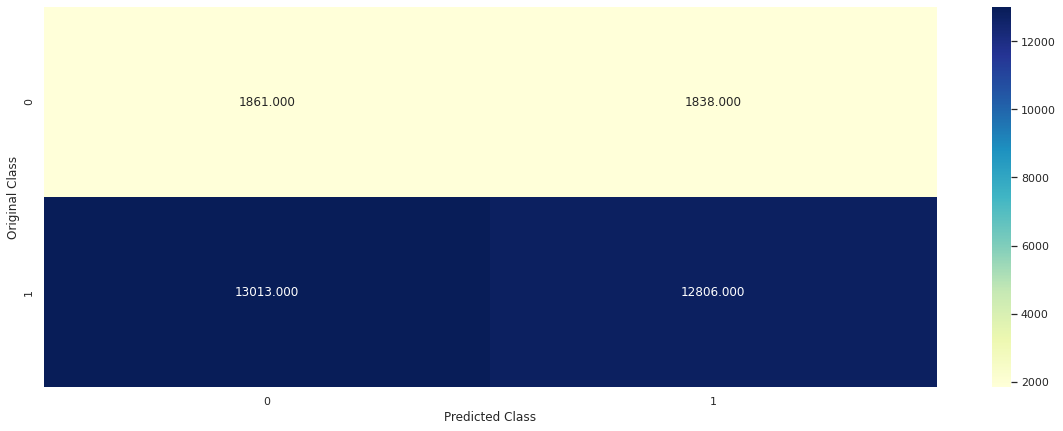

-------------------- Precision matrix (Columm Sum=1) --------------------


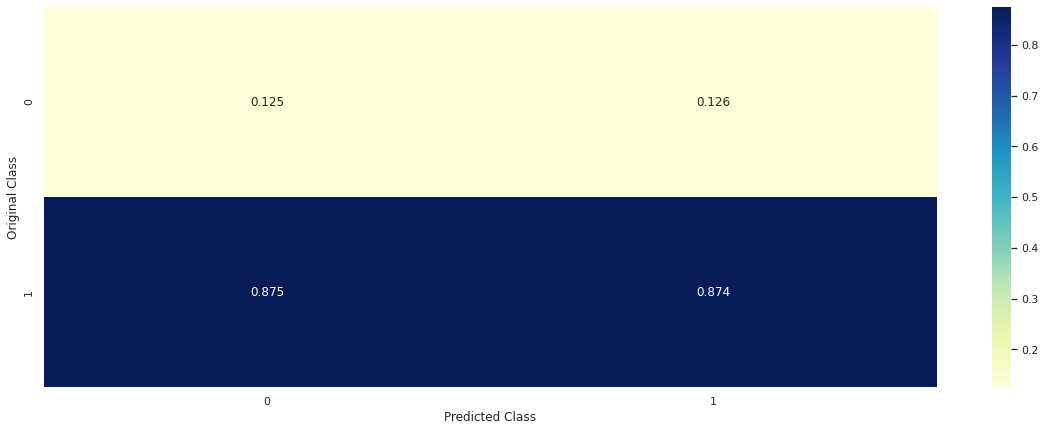

-------------------- Recall matrix (Row sum=1) --------------------


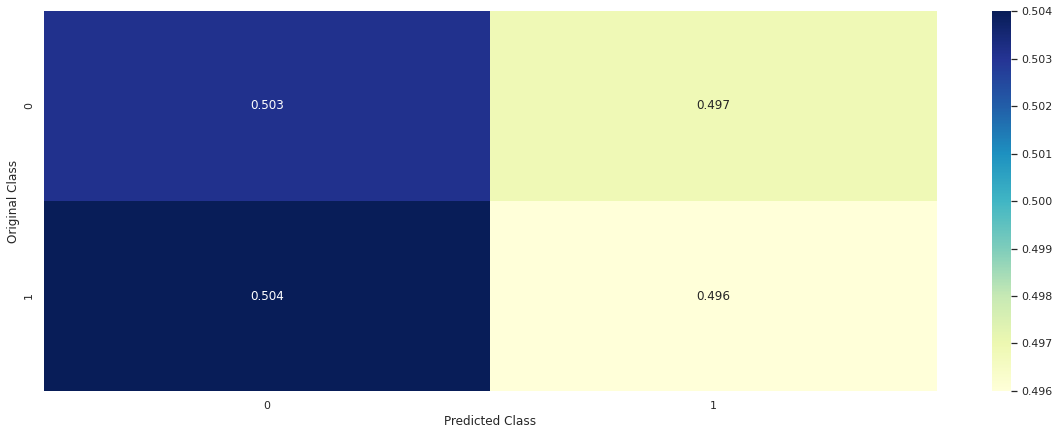

In [ ]:
# We need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
# We create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

We found that the class of 0 was highly Imbalanced the minority class was about
12.50% and thats why most of the prediction model was predicting higher values 
and to handel this situation we used the concept of Up sampling the data by 
putting duplicate values of Minority
Class

## Logistic Regression with class balancing

for alpha = 1e-06
Log Loss : 0.3583741973056819
for alpha = 1e-05
Log Loss : 0.33410751428057683
for alpha = 0.0001
Log Loss : 0.3025418160550398
for alpha = 0.001
Log Loss : 0.3003022735560267
for alpha = 0.01
Log Loss : 0.30184894206857465
for alpha = 0.1
Log Loss : 0.3047759284929228
for alpha = 1
Log Loss : 0.3105108900439599
for alpha = 10
Log Loss : 0.31364846764333576
for alpha = 100
Log Loss : 0.31420571193782953
for alpha = 1000
Log Loss : 0.31423102336865655
for alpha = 10000
Log Loss : 0.3142707025037973
for alpha = 100000
Log Loss : 0.31429166983926654


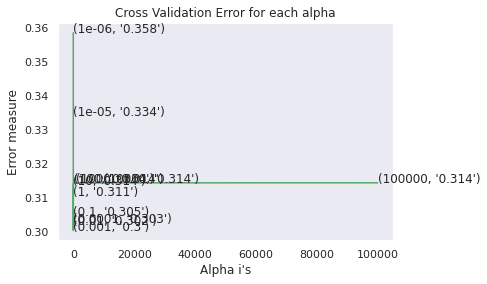

For values of best alpha =  0.001 The train log loss is: 0.29612631948598334
For values of best alpha =  0.001 The cross validation log loss is: 0.3003022735560267
For values of best alpha =  0.001 The test log loss is: 0.29743187269258287


In [ ]:
alpha = [10 ** x for x in range(-6, 6)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.2979462032962917
Number of mis-classified points : 0.12287844474414107

-------------------- Confusion matrix --------------------


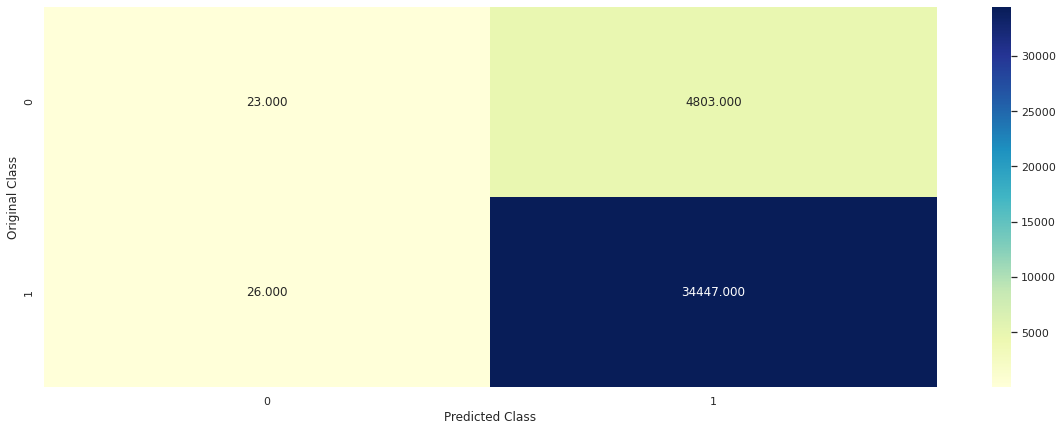

-------------------- Precision matrix (Columm Sum=1) --------------------


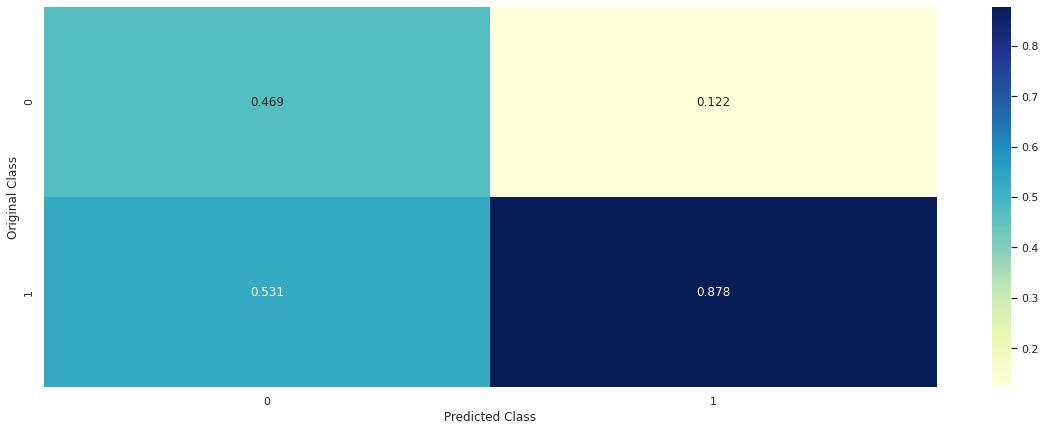

-------------------- Recall matrix (Row sum=1) --------------------


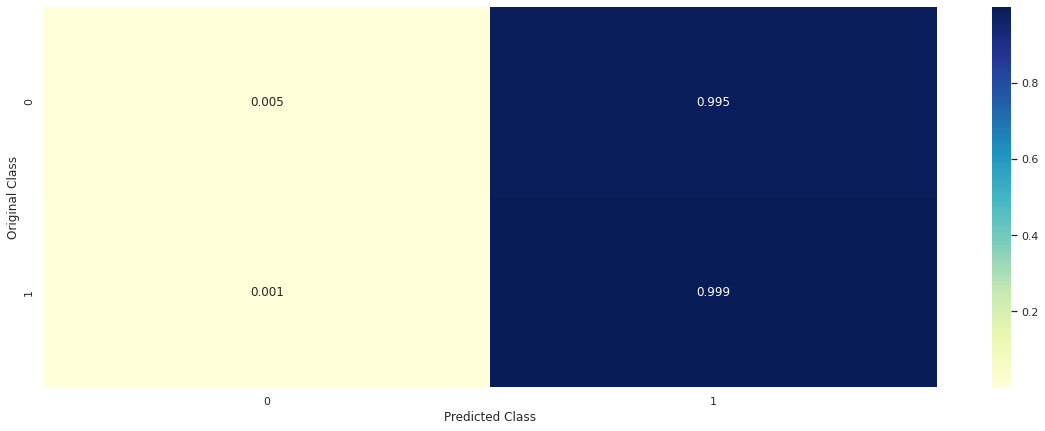

In [ ]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(X_train, y_train, X_cv, y_cv, clf)

**TRAINING THE MODEL**

## Test some points out

- Correctly predicted

In [ ]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1, -1)),4))
print("Actual Class :", yr[test_point_index].reshape(1, -1))
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

Predicted Class : 1
Predicted Class Probabilities: [[0.0912 0.9088]]
Actual Class : [[1]]


- Incorrectly predicted

In [ ]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)
test_point_index = 5456
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1, -1)),4))
print("Actual Class :", yr[test_point_index].reshape(1, -1))
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

Predicted Class : 1
Predicted Class Probabilities: [[0.1113 0.8887]]
Actual Class : [[1]]


# Linear Support Vector Machines

for alpha = 1e-06
Log Loss : 0.34395057375737187
for alpha = 1e-05
Log Loss : 0.3390516018714481
for alpha = 0.0001
Log Loss : 0.3363538213923128
for alpha = 0.001
Log Loss : 0.33324361292062726
for alpha = 0.01
Log Loss : 0.3303836736464843
for alpha = 0.1
Log Loss : 0.33260342421136674
for alpha = 1
Log Loss : 0.32363033193450313
for alpha = 10
Log Loss : 0.32933096538432255
for alpha = 100
Log Loss : 0.31428186191941815
for alpha = 1000
Log Loss : 0.3142809598463374
for alpha = 10000
Log Loss : 0.3143030283893188
for alpha = 100000
Log Loss : 0.3143671399755044


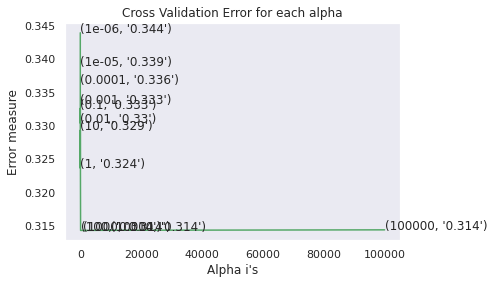

For values of best alpha =  1000 The train log loss is: 0.30957744057954156
For values of best alpha =  1000 The cross validation log loss is: 0.3142809598463374
For values of best alpha =  1000 The test log loss is: 0.3108531436540893


In [ ]:
alpha = [10 ** x for x in range(-6, 6)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.3142809598463374
Number of mis-classified points : 0.12498306156556303

-------------------- Confusion matrix --------------------


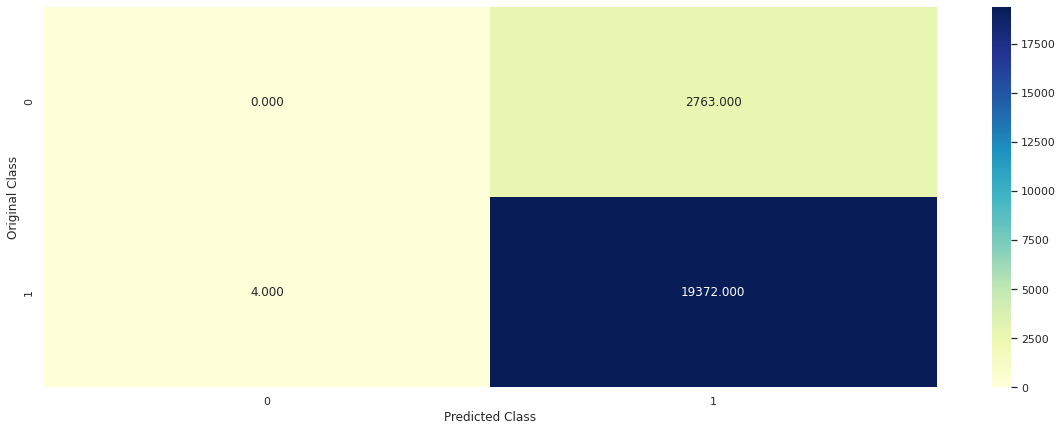

-------------------- Precision matrix (Columm Sum=1) --------------------


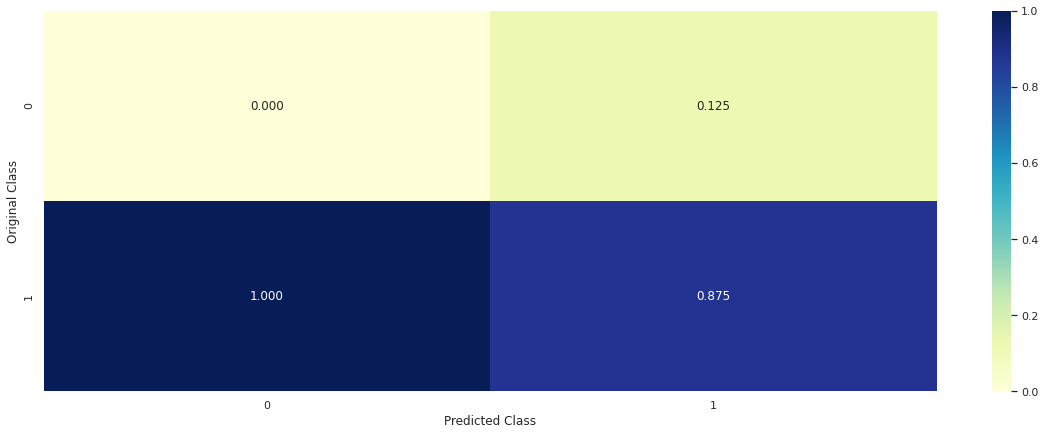

-------------------- Recall matrix (Row sum=1) --------------------


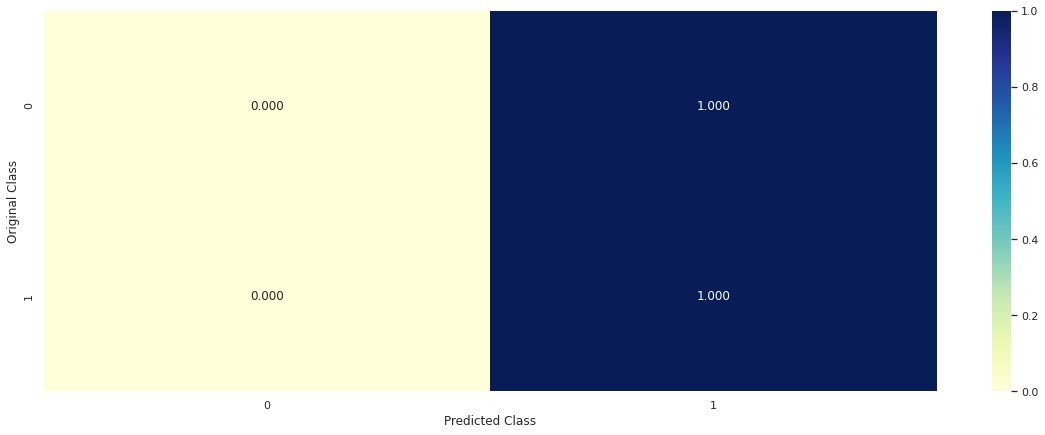

In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
predict_and_plot_confusion_matrix(X_train, y_train, X_cv, y_cv, clf)

## Test some points out

- Correctly Classified

In [ ]:
# from tabulate import tabulate
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train,y_train)
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1, -1)),4))
print("Actual Class :", yr[test_point_index].reshape(1, -1))
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

Predicted Class : 1
Predicted Class Probabilities: [[0.1059 0.8941]]
Actual Class : [[1]]


- Incorrectly Classified

In [ ]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(X_train,y_train)
test_point_index = 5456
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1, -1)),4))
print("Actual Class :", yr[test_point_index].reshape(1, -1))
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

Predicted Class : 1
Predicted Class Probabilities: [[0.1786 0.8214]]
Actual Class : [[1]]


## Random Forest

In [ ]:
alpha = [100,300,500]
max_depth = [3, 5]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cv)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 



best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best estimator = ', 
      alpha[int(best_alpha/2)], 
      "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_cv)
print('For values of best estimator = ', 
      alpha[int(best_alpha/2)], 
      "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best estimator = ', 
      alpha[int(best_alpha/2)], 
      "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  3
Log Loss : 0.28354675337331575
for n_estimators = 100 and max depth =  5
Log Loss : 0.2732493763465254
for n_estimators = 300 and max depth =  3
Log Loss : 0.28319479127447267
for n_estimators = 300 and max depth =  5
Log Loss : 0.27323811601108217
for n_estimators = 500 and max depth =  3
Log Loss : 0.283182145780339
for n_estimators = 500 and max depth =  5
Log Loss : 0.27317627166287023
For values of best estimator =  500 The train log loss is: 0.2637736113269699
For values of best estimator =  500 The cross validation log loss is: 0.27317627166287023
For values of best estimator =  500 The test log loss is: 0.2698448220751733


Log loss : 0.27317627168796
Number of mis-classified points : 0.09648132255296084

-------------------- Confusion matrix --------------------


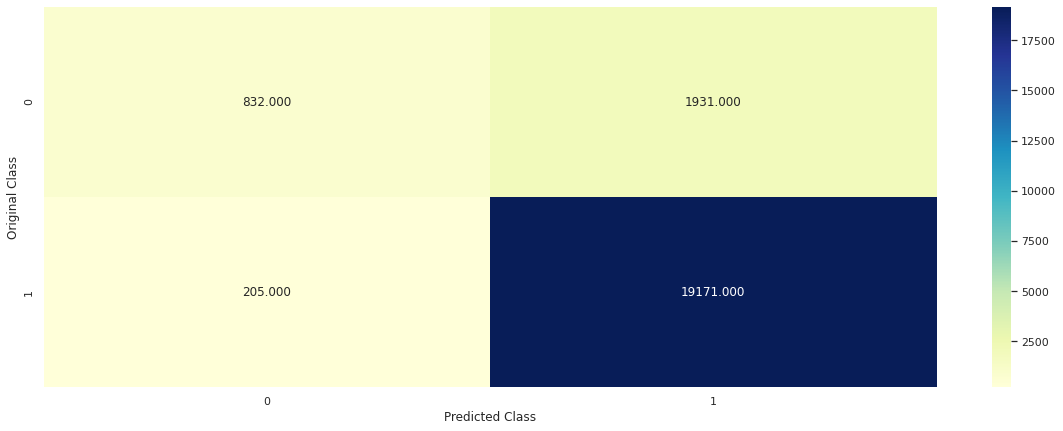

-------------------- Precision matrix (Columm Sum=1) --------------------


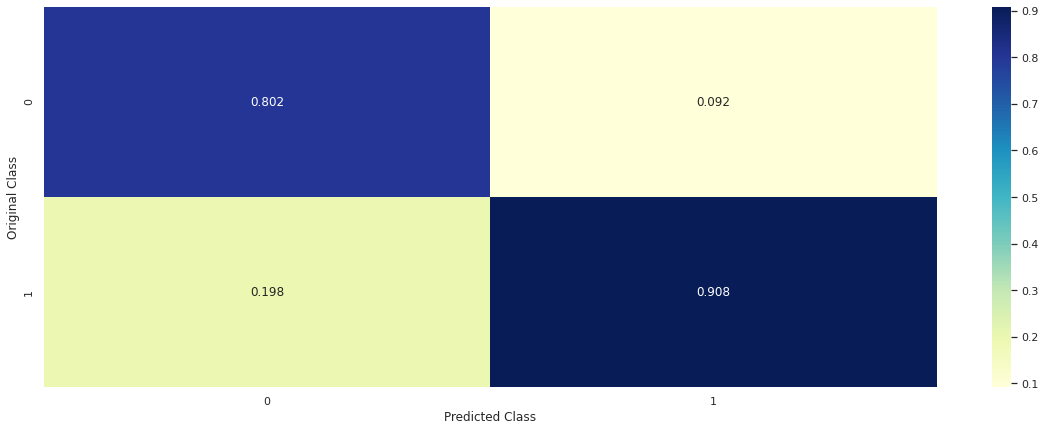

-------------------- Recall matrix (Row sum=1) --------------------


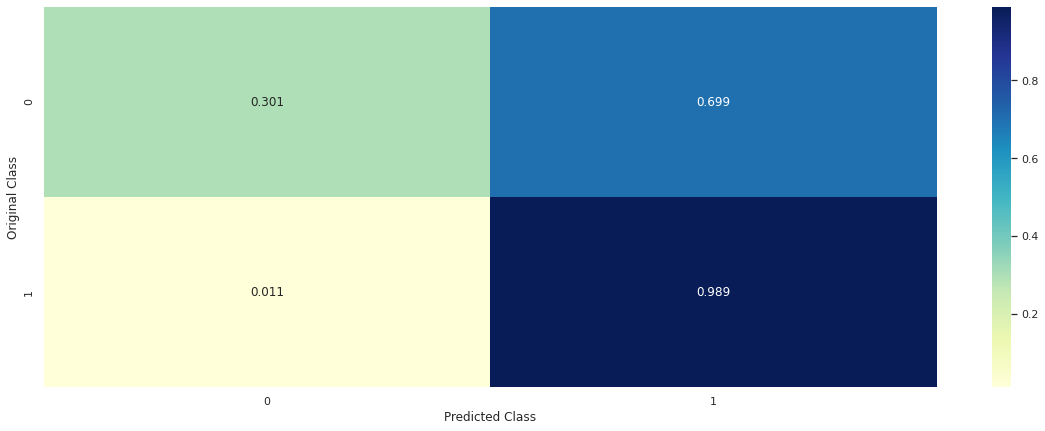

In [ ]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(X_train, y_train,X_cv,y_cv, clf)

## Test some points out

- Correctly classified

In [ ]:
test_point_index = 5
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1,-1)),4))
print("Actual Class :", yr[test_point_index].reshape(1,-1))
indices = np.argsort(-clf.feature_importances_)

Predicted Class : 1
Predicted Class Probabilities: [[0.0602 0.9398]]
Actual Class : [[1]]


- Incorrectly Classified

In [ ]:
test_point_index = 5456
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1,-1)),4))
print("Actual Class :", yr[test_point_index].reshape(1,-1))
indices = np.argsort(-clf.feature_importances_)

Predicted Class : 1
Predicted Class Probabilities: [[0.1698 0.8302]]
Actual Class : [[1]]


## Let's try UP SAMPLING

In [ ]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
print('Before Upsampling',X.shape, ' ', y.shape)
print('After Upsampling',X_over.shape, ' ', y_over.shape)

Before Upsampling (118071, 32)   (118071,)
After Upsampling (206652, 32)   (206652,)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=42)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.25,random_state = 42)

In [ ]:
#Use standardscaler to standardize the features

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_cv  = sc.transform(X_cv)
X_test  = sc.transform(X_test)

## Logistic Regression

for alpha = 1e-06
Log Loss : 0.612615615994828
for alpha = 1e-05
Log Loss : 0.567703874160378
for alpha = 0.0001
Log Loss : 0.5198259991424637
for alpha = 0.001
Log Loss : 0.5168390361389236
for alpha = 0.01
Log Loss : 0.5219835040382559
for alpha = 0.1
Log Loss : 0.5298448273540146
for alpha = 1
Log Loss : 0.5421367708663628
for alpha = 10
Log Loss : 0.5489877786109534
for alpha = 100
Log Loss : 0.5501495983756718
for alpha = 1000
Log Loss : 0.5502747272531426
for alpha = 10000
Log Loss : 0.5502863737407417
for alpha = 100000
Log Loss : 0.5502869680167465


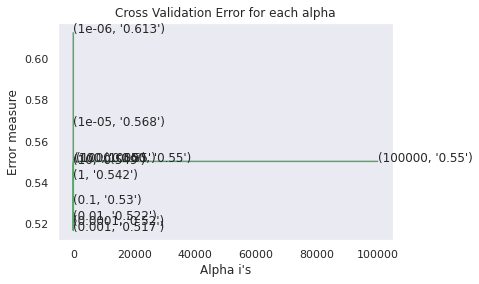

For values of best alpha =  0.001 The train log loss is: 0.5165717255516152
For values of best alpha =  0.001 The cross validation log loss is: 0.5168390361389236
For values of best alpha =  0.001 The test log loss is: 0.5211876545211263


In [ ]:
alpha = [10 ** x for x in range(-6, 6)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', 
      alpha[best_alpha], 
      "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.5168390361389236
Number of mis-classified points : 0.24654175699390937

-------------------- Confusion matrix --------------------


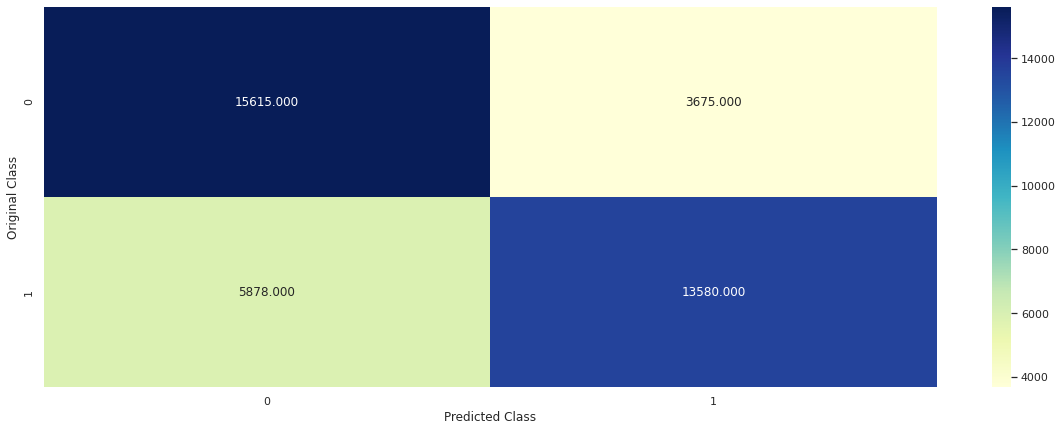

-------------------- Precision matrix (Columm Sum=1) --------------------


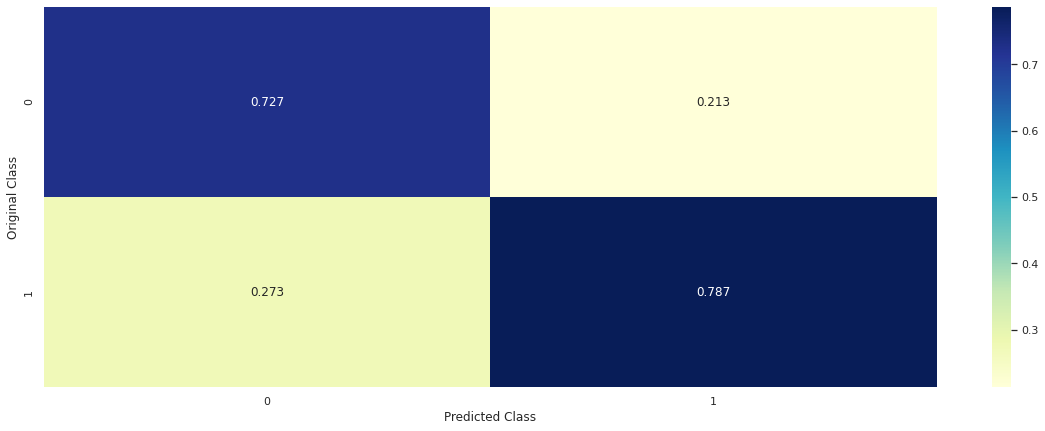

-------------------- Recall matrix (Row sum=1) --------------------


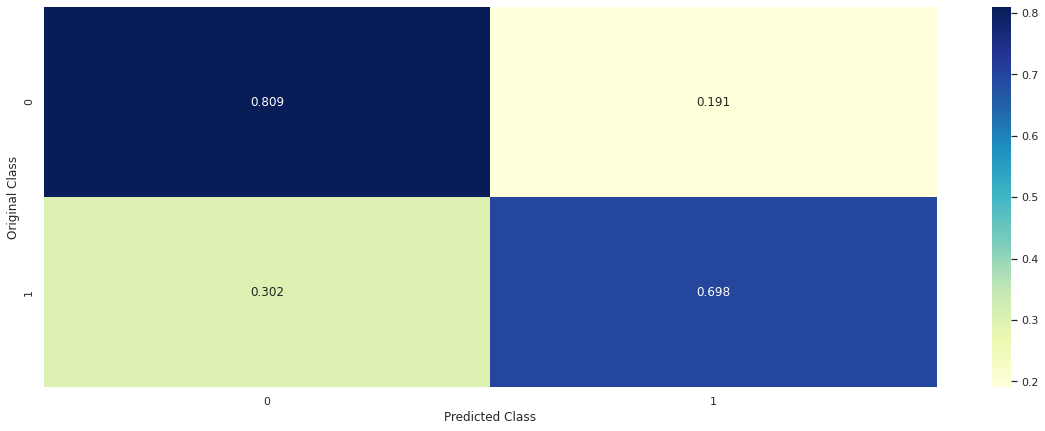

In [ ]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(X_train, y_train, X_cv, y_cv, clf)

- This was correctly classified before upsampling by all models

In [ ]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train,y_train)
test_point_index = 1
no_feature = 1000
predicted_cls = sig_clf.predict(Xr[test_point_index].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(Xr[test_point_index].reshape(1, -1)),4))
print("Actual Class :", yr[test_point_index].reshape(1, -1))
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]

Predicted Class : 0
Predicted Class Probabilities: [[0.5738 0.4262]]
Actual Class : [[1]]


## Lets summarize above models before proceeding with the feature engineering approach.

In [ ]:
from prettytable import PrettyTable

ptable = PrettyTable()
ptable.title = "*** Model Summary *** [Performance Metric: Log-Loss]"
ptable.field_names=["Model Name","Train LogLoss","CV LogLoss","Test LogLoss","% Misclassified Points"]
ptable.add_row(["Logistic Regression With Class balancing","0.298","0.297","0.302","0.122"])
ptable.add_row(["Linear SVM","0.309","0.308","0.312","0.122"])
ptable.add_row(["Random Forest Classifier ","0.265","0.266","0.272","0.095"])
ptable.add_row(["Logistic Regression With Class balancing(UP SAMPLING) ","0.522","0.521","0.522","0.247"])


print(ptable)

+-----------------------------------------------------------------------------------------------------------------------------+
|                                     *** Model Summary *** [Performance Metric: Log-Loss]                                    |
+--------------------------------------------------------+---------------+------------+--------------+------------------------+
|                       Model Name                       | Train LogLoss | CV LogLoss | Test LogLoss | % Misclassified Points |
+--------------------------------------------------------+---------------+------------+--------------+------------------------+
|        Logistic Regression With Class balancing        |     0.298     |   0.297    |    0.302     |         0.122          |
|                       Linear SVM                       |     0.309     |   0.308    |    0.312     |         0.122          |
|               Random Forest Classifier                 |     0.265     |   0.266    |    0.272     |  

# CONCLUSION:
- In Log-loss method which have lower value of log-loss,that model will be the better performer.
- So,From the pretty table we can see that , __RandomForest__ performed best here.
- Even the overfitting is not present if we check the train and test logloss, they are very close
- Over sampling method was also applied on the training data to make the data more balanced, but it gave worse results.
